# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Datasets

In [2]:
df_train = pd.read_csv('../DataSets/Titanic_train.csv')
df_test = pd.read_csv('../DataSets/Titanic_test.csv')

In [3]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Imputation - handelling missing data

In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
selected_columns = list(df_train.columns)

In [8]:
selected_columns.remove('PassengerId')
selected_columns.remove('Name')
selected_columns.remove('Ticket')
selected_columns.remove('Cabin')

In [9]:
selected_columns

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [10]:
df_train[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<AxesSubplot:>

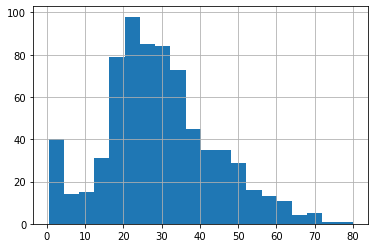

In [11]:
# check histogram for the columns if missing data is there

df_train['Age'].hist(bins=20)

In [12]:
# here outliers are there in "Age" column, so use median to replace missing data

df_train['Age'].median()

28.0

In [13]:
# check missing values for 'Age' column in train and test data

df_train['Age'].isna().sum(), df_test['Age'].isna().sum()

(177, 86)

In [14]:
# fill missing values permenantly of 'Age' column by median of 'Age' column of train 

df_train['Age'].fillna(df_train['Age'].median(), inplace = True)
df_test['Age'].fillna(df_train['Age'].median(), inplace = True)

In [15]:
# if classes are there for some column with missing values, then use .value_counts(),  don't use histograms

df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df_train['Embarked'].isna().sum(), df_test['Embarked'].isna().sum()

(2, 0)

In [17]:
# fill missing values permenantly, if classes are there in column by mode of the same column from train data 

df_train['Embarked'].mode().iloc[0]

'S'

In [18]:
df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace = True)

In [19]:
df_train[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [20]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
# handle missing values of test data also

<AxesSubplot:>

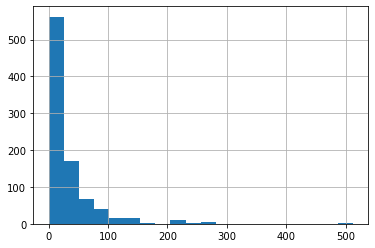

In [22]:
df_train['Fare'].hist(bins=20)

In [23]:
# here outliers are there, so use median to replace missing values

In [24]:
df_train['Fare'].median()

14.4542

In [25]:
df_test['Fare'].fillna(df_train['Fare'].median(), inplace = True)

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Feature Encoding

In [27]:
df_train[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
# do encoding for train and test data also

# do encoding for the columns with datatype as object

In [29]:
# Encoding of 'Age' column

In [30]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [31]:
# As in 'Age' coulmn only 2 classes are there, so we can do direct encoding

In [32]:
df_train['Encod_Sex'] = df_train['Sex'].apply(lambda X:0 if X=='male' else 1)
df_test['Encod_Sex'] = df_test['Sex'].apply(lambda X:0 if X=='male' else 1)

In [33]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Encod_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Encod_Sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [35]:
selected_columns

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [36]:
selected_columns.append('Encod_Sex')

In [37]:
selected_columns

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Encod_Sex']

In [38]:
# Encoding of 'Embarked' column

In [39]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [40]:
# need to do one-hot encoding, as number of classes are more than 2

In [41]:
pd.get_dummies(df_train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [42]:
temp = pd.get_dummies(df_train['Embarked'])

df_train = pd.concat([df_train, temp], axis=1)

temp1 = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test, temp1], axis=1)

In [43]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Encod_Sex,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


In [44]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Encod_Sex,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1


In [45]:
selected_columns.extend(temp.columns)

In [46]:
selected_columns

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Encod_Sex',
 'C',
 'Q',
 'S']

# Feature Selection

In [47]:
df_train[selected_columns].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Encod_Sex,C,Q,S
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.131900,-0.243292,0.221009,0.074053
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.081163,0.030248,-0.031415,-0.006729
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.182333,0.269335,-0.117216,-0.162184
Encod_Sex,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,1.000000,0.082853,0.074115,-0.119224
C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,0.082853,1.000000,-0.148258,-0.782742
Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,0.074115,-0.148258,1.000000,-0.499421
S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,-0.119224,-0.782742,-0.499421,1.000000


In [48]:
df_train[selected_columns].corr()['Survived']

Survived     1.000000
Pclass      -0.338481
Age         -0.064910
SibSp       -0.035322
Parch        0.081629
Fare         0.257307
Encod_Sex    0.543351
C            0.168240
Q            0.003650
S           -0.149683
Name: Survived, dtype: float64

In [49]:
# if number of columns are in 100's, then column may be delete/drop whoes correlation is very less (<0.1)

# here number of columns are very less so all columns we will selecte

In [50]:
selected_columns.remove('Survived')
selected_columns.remove('Sex')
selected_columns.remove('Embarked')

In [51]:
selected_columns

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Encod_Sex', 'C', 'Q', 'S']

# import algorithm - SVM

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scalar = MinMaxScaler()

In [54]:
scalar.fit(df_train[selected_columns])

MinMaxScaler()

In [55]:
X_train_scaled = scalar.transform(df_train[selected_columns])

In [56]:
X_test_scaled = scalar.transform(df_test[selected_columns])

In [57]:
from sklearn.svm import SVC

# apply different kernels

In [58]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train_scaled, df_train['Survived'])
model_linear.score(X_train_scaled, df_train['Survived'])

0.7867564534231201

In [59]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(X_train_scaled, df_train['Survived'])
model_rbf.score(X_train_scaled, df_train['Survived'])

0.8125701459034792

In [60]:
model_poly = SVC(kernel = 'poly')
model_poly.fit(X_train_scaled, df_train['Survived'])
model_poly.score(X_train_scaled, df_train['Survived'])

0.8159371492704826

In [61]:
model_sigmoid = SVC(kernel = 'sigmoid')
model_sigmoid.fit(X_train_scaled, df_train['Survived'])
model_sigmoid.score(X_train_scaled, df_train['Survived'])

0.7351290684624018

# Feature Creation

In [62]:
# feature creation of 'Name' column

df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [63]:
# str1 = 'Braund, Mr. Own Harris'
# str1.split(',')[1].split('.')[0].lstrip()

df_train['Name'].apply(lambda X: X.split(',')[1].split('.')[0].lstrip())

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [64]:
df_test['Name'].apply(lambda X: X.split(',')[1].split('.')[0].lstrip())

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name, Length: 418, dtype: object

In [65]:
name_titles = df_train['Name'].apply(lambda X: X.split(',')[1].split('.')[0].lstrip())
name_titles_1 = df_test['Name'].apply(lambda X: X.split(',')[1].split('.')[0].lstrip())

In [66]:
name_titles.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Capt              1
Jonkheer          1
Ms                1
Don               1
Lady              1
Sir               1
Mme               1
the Countess      1
Name: Name, dtype: int64

In [67]:
name_titles_1.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: Name, dtype: int64

In [68]:
name_titles.value_counts()[:4]

Mr        517
Miss      182
Mrs       125
Master     40
Name: Name, dtype: int64

In [69]:
name_titles_1.value_counts()[:4]

Mr        240
Miss       78
Mrs        72
Master     21
Name: Name, dtype: int64

In [70]:
titles = list(name_titles.value_counts()[:4].index)

In [71]:
titles_1 = list(name_titles_1.value_counts()[:4].index)

In [72]:
df_train['Title'] = ['other' if not title in titles else title for title in name_titles]

In [73]:
df_train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: Title, dtype: int64

In [74]:
df_test['Title'] = ['other' if not title in titles_1 else title for title in name_titles_1]

In [75]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
other       7
Name: Title, dtype: int64

In [76]:
df_train.groupby('Title').mean()['Survived']

# here judge the data which gives more information

Title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: Survived, dtype: float64

In [77]:
pd.get_dummies(df_train['Title'])

,Master,Miss,Mr,Mrs,other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [78]:
temp = pd.get_dummies(df_train['Title'])

In [79]:
df_train = pd.concat([df_train, temp], axis=1)

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Encod_Sex,C,Q,S,Title,Master,Miss,Mr,Mrs,other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,1,Mr,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,1,0,0,Mrs,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,Miss,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,Mrs,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,1,Mr,0,0,1,0,0


In [81]:
pd.get_dummies(df_test['Title'])

,Master,Miss,Mr,Mrs,other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
413,0,0,1,0,0
414,0,0,0,0,1
415,0,0,1,0,0
416,0,0,1,0,0


In [82]:
temp1 = pd.get_dummies(df_test['Title'])

In [83]:
df_test = pd.concat([df_test, temp1], axis=1)

In [84]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Encod_Sex,C,Q,S,Title,Master,Miss,Mr,Mrs,other
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,1,0,Mr,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0,1,Mrs,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,Mr,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,0,1,Mr,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,0,0,1,Mrs,0,0,0,1,0


In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Encod_Sex    891 non-null    int64  
 13  C            891 non-null    uint8  
 14  Q            891 non-null    uint8  
 15  S            891 non-null    uint8  
 16  Title        891 non-null    object 
 17  Master       891 non-null    uint8  
 18  Miss         891 non-null    uint8  
 19  Mr      

In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Encod_Sex    418 non-null    int64  
 12  C            418 non-null    uint8  
 13  Q            418 non-null    uint8  
 14  S            418 non-null    uint8  
 15  Title        418 non-null    object 
 16  Master       418 non-null    uint8  
 17  Miss         418 non-null    uint8  
 18  Mr           418 non-null    uint8  
 19  Mrs     

In [87]:
selected_columns

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Encod_Sex', 'C', 'Q', 'S']

In [88]:
selected_columns.extend(temp.columns)

In [89]:
selected_columns

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Encod_Sex',
 'C',
 'Q',
 'S',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'other']

In [90]:
# Feature creation of 'Age' column

df_train['Age_Group'] = ['child' if i<25 else 'young' if i<55 else 'old' for i in df_train['Age']]
df_test['Age_Group'] = ['child' if i<25 else 'young' if i<55 else 'old' for i in df_test['Age']]

In [91]:
df_train[['Age', 'Age_Group']]

,Age,Age_Group
0,22.0,child
1,38.0,young
2,26.0,young
3,35.0,young
4,35.0,young
...,...,...
886,27.0,young
887,19.0,child
888,28.0,young
889,26.0,young


In [92]:
df_test[['Age', 'Age_Group']]

,Age,Age_Group
0,34.5,young
1,47.0,young
2,62.0,old
3,27.0,young
4,22.0,child
...,...,...
413,28.0,young
414,39.0,young
415,38.5,young
416,28.0,young


In [93]:
df_train.groupby('Age_Group').mean()['Survived']

Age_Group
child    0.424460
old      0.309524
young    0.369527
Name: Survived, dtype: float64

In [95]:
# df_test.groupby('Age_Group').mean()['Survived']

In [96]:
pd.get_dummies(df_train['Age_Group'])

,child,old,young
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,1,0,0
888,0,0,1
889,0,0,1


In [97]:
temp = pd.get_dummies(df_train['Age_Group'])

df_train = pd.concat([df_train, temp], axis=1)

temp1 = pd.get_dummies(df_test['Age_Group'])
df_test = pd.concat([df_test, temp1], axis=1)

In [98]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Master,Miss,Mr,Mrs,other,Age_Group,child,old,young
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,0,0,1,0,0,child,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,0,0,0,1,0,young,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,0,1,0,0,0,young,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,0,0,0,1,0,young,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,0,0,1,0,0,young,0,0,1


In [99]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title,Master,Miss,Mr,Mrs,other,Age_Group,child,old,young
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,Mr,0,0,1,0,0,young,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,Mrs,0,0,0,1,0,young,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,Mr,0,0,1,0,0,old,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,Mr,0,0,1,0,0,young,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,Mrs,0,0,0,1,0,child,1,0,0


In [100]:
selected_columns

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Encod_Sex',
 'C',
 'Q',
 'S',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'other']

In [101]:
selected_columns.extend(temp.columns)

In [102]:
selected_columns

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Encod_Sex',
 'C',
 'Q',
 'S',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'other',
 'child',
 'old',
 'young']

# import algorithm - SVM_different kernel

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scalar = MinMaxScaler()

In [105]:
scalar.fit(df_train[selected_columns])

MinMaxScaler()

In [106]:
scalar.data_max_

array([  3.    ,  80.    ,   8.    ,   6.    , 512.3292,   1.    ,
         1.    ,   1.    ,   1.    ,   1.    ,   1.    ,   1.    ,
         1.    ,   1.    ,   1.    ,   1.    ,   1.    ])

In [107]:
scalar.data_min_

array([1.  , 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [108]:
X_train_scaled = scalar.transform(df_train[selected_columns])

In [109]:
X_test_scaled = scalar.transform(df_test[selected_columns])

# apply different kernels

In [110]:
from sklearn.svm import SVC

In [111]:
model_linear = SVC(kernel = 'linear')
model_linear.fit(X_train_scaled, df_train['Survived'])
model_linear.score(X_train_scaled, df_train['Survived'])

0.8282828282828283

In [112]:
model_rbf = SVC(kernel = 'rbf')
model_rbf.fit(X_train_scaled, df_train['Survived'])
model_rbf.score(X_train_scaled, df_train['Survived'])

0.8428731762065096

In [113]:
model_poly = SVC(kernel = 'poly')
model_poly.fit(X_train_scaled, df_train['Survived'])
model_poly.score(X_train_scaled, df_train['Survived'])

0.8439955106621774

In [114]:
model_sigmoid = SVC(kernel = 'sigmoid')
model_sigmoid.fit(X_train_scaled, df_train['Survived'])
model_sigmoid.score(X_train_scaled, df_train['Survived'])

0.7104377104377104

In [115]:
y_pred = model_rbf.predict(X_test_scaled)

In [116]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [117]:
df_test['Survived'] = y_pred

In [118]:
df_test[['PassengerId', 'Survived']].to_csv('../DataSets/Titanic_gender_submission8.csv', index = False)

In [119]:
y_pred = model_poly.predict(X_test_scaled)

In [120]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
df_test['Survived'] = y_pred

In [122]:
df_test[['PassengerId', 'Survived']].to_csv('../DataSets/Titanic_gender_submission9.csv', index = False)